In [16]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [17]:
datos = pd.DataFrame(data=[[2,4,6,8,10,12], [3,6,9,12,15,18]]).T
datos.columns = ["x1", "x2"]

In [18]:
datos

,x1,x2
0,2,3
1,4,6
2,6,9
3,8,12
4,10,15
5,12,18


<Axes: xlabel='x1', ylabel='x2'>

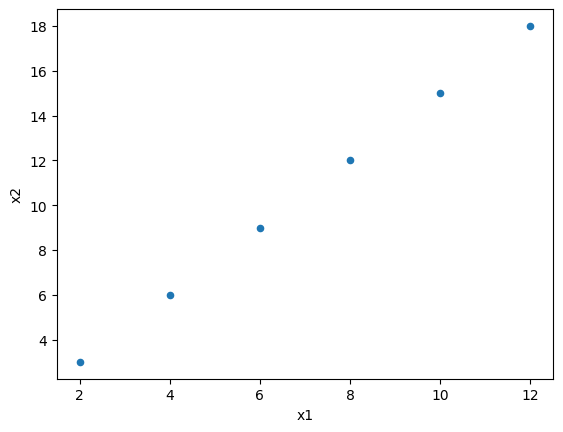

In [19]:
datos.plot.scatter("x1", y="x2")

In [20]:
std = StandardScaler()
std.fit(datos)

StandardScaler()

In [21]:
pca = PCA(n_components=1)
pca.fit(std.transform(datos))

PCA(n_components=1)

In [22]:
pca.explained_variance_ratio_

array([1.])

In [23]:
pd.DataFrame(
    data    = pca.components_,
    columns = datos.columns,
    index   = ['PC1']
)

,x1,x2
PC1,-0.707107,-0.707107


In [24]:
proyecciones = np.dot(pca.components_, std.transform(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones

,PC1
0,2.070197
1,1.242118
2,0.414039
3,-0.414039
4,-1.242118
5,-2.070197


In [25]:
reconstruccion = pca.inverse_transform(X=proyecciones)
reconstruccion

,0,1
0,-1.46385,-1.46385
1,-0.87831,-0.87831
2,-0.29277,-0.29277
3,0.29277,0.29277
4,0.87831,0.87831
5,1.46385,1.46385


In [26]:
std.inverse_transform(reconstruccion)

array([[ 2.,  3.],
       [ 4.,  6.],
       [ 6.,  9.],
       [ 8., 12.],
       [10., 15.],
       [12., 18.]])

In [27]:
# Repetir
datos = pd.DataFrame(data=[[2,4,6,8,10,12], [3*1.01,6*1.02,9*1.03,12*1.04,15*1.05,18*1.06]]).T
datos.columns = ["x1", "x2"]

In [28]:
datos

,x1,x2
0,2.0,12.12
1,4.0,10.20
2,6.0,8.24
3,8.0,6.24
4,10.0,4.20
5,12.0,2.12


In [29]:
std = StandardScaler()
std.fit(datos)

StandardScaler()

In [31]:
pca = PCA(n_components=1)
pca.fit(std.transform(datos))

PCA(n_components=1)

In [32]:
pca.explained_variance_

array([2.39987202])

In [33]:
pd.DataFrame(
    data= pca.components_,
    columns=datos.columns,
    index= ['PC1']
)

,x1,x2
PC1,0.707107,-0.707107


In [34]:
proyecciones = np.dot(pca.components_, std.transform(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones

,PC1
0,-2.056286
1,-1.244812
2,-0.425057
3,0.402977
4,1.239292
5,2.083886


In [35]:
reconstruccion = pca.inverse_transform(X=proyecciones)
reconstruccion

,0,1
0,-1.454014,1.454014
1,-0.880215,0.880215
2,-0.300561,0.300561
3,0.284948,-0.284948
4,0.876312,-0.876312
5,1.473530,-1.473530
